#**Logistics Regression**

#**Theoretical**

-----

**1. What is Logistic Regression, and how does it differ from Linear Regression?**

* **Linear Regression:** Predicts a continuous numerical output (e.g., house price). It fits a straight line to the data.
* **Logistic Regression:** Predicts a categorical output (e.g., yes/no, spam/not spam). It estimates the probability of an event occurring, then classifies based on a threshold. It uses a "squishing" function (sigmoid) to constrain the output between 0 and 1.

-----

**2. What is the mathematical equation of Logistic Regression?**

* The equation is: $P(y=1|x) = \frac{1}{1 + e^{-(\beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n)}}$
    * Where:
        * $P(y=1|x)$ is the probability of the output being 1 (e.g., "yes").
        * $e$ is Euler's number.
        * $\beta_0, \beta_1, ... \beta_n$ are the coefficients.
        * $x_1, x_2, ... x_n$ are the input features.

----

**3. Why do we use the Sigmoid function in Logistic Regression?**

* The sigmoid function (the fraction in the equation above) "squishes" any real number into a value between 0 and 1. This is perfect for probabilities, which must be within that range. It takes the linear output of the input features, and transforms it into a probability.

----

**4. What is the cost function of Logistic Regression?**

* The cost function is called "cross-entropy" or "log loss." It measures how wrong our predictions are. It penalizes incorrect predictions more heavily when they are made with high confidence. The goal is to minimize this cost.


----

**5. What is Regularization in Logistic Regression? Why is it needed?**

* Regularization adds a penalty to the cost function based on the size of the coefficients. This prevents "overfitting," where the model learns the training data too well and performs poorly on new data. It keeps the model simple.

----

**6. Explain the difference between Lasso, Ridge, and Elastic Net regression.**

* **Ridge (L2):** Adds a penalty proportional to the *square* of the coefficients. Shrinks all coefficients, but rarely makes them exactly zero.
* **Lasso (L1):** Adds a penalty proportional to the *absolute value* of the coefficients. Can shrink some coefficients to exactly zero, effectively performing feature selection.
* **Elastic Net:** A combination of Ridge and Lasso. It adds both L1 and L2 penalties, providing a balance between feature selection and coefficient shrinkage.

----

**7. When should we use Elastic Net instead of Lasso or Ridge?**

* When you have many features, and you suspect that some are correlated. Elastic Net combines the strengths of both Lasso and Ridge, handling correlated features better than Lasso alone and providing feature selection.

----

**8. What is the impact of the regularization parameter (λ) in Logistic Regression?**

* The regularization parameter (lambda, often represented as "C" in libraries, where C=1/lambda) controls the strength of regularization.
    * A large lambda (small C) means strong regularization: coefficients shrink more, simplifying the model.
    * A small lambda (large C) means weak regularization: the model can become more complex, potentially overfitting.

----

**9. What are the key assumptions of Logistic Regression?**

* Binary output.
* Independence of features.
* Linearity between features and the log-odds of the outcome.
* No severe multicollinearity (high correlation between features).


----

**10. What are some alternatives to Logistic Regression for classification tasks?**

* Decision Trees
* Random Forests
* Support Vector Machines (SVMs)
* K-Nearest Neighbors (KNN)
* Neural Networks

----

**11. What are Classification Evaluation Metrics?**

* **Accuracy:** Overall correct predictions.
* **Precision:** Correct positive predictions out of all positive predictions.
* **Recall (Sensitivity):** Correct positive predictions out of all actual positive cases.
* **F1-score:** Harmonic mean of precision and recall.
* **AUC-ROC:** Area under the Receiver Operating Characteristic curve, measuring the ability to distinguish between classes.


-----

**12. How does class imbalance affect Logistic Regression?**

* If one class is much more frequent than the other, the model may be biased towards the majority class. It might perform well on the majority class but poorly on the minority class. Solutions include oversampling, undersampling, and using class weights.

------

**13. What is Hyperparameter Tuning in Logistic Regression?**

* It's the process of finding the best values for parameters like the regularization strength (C) and the solver. Techniques include grid search and cross-validation.

------

**14. What are different solvers in Logistic Regression? Which one should be used?**

* Solvers are algorithms used to optimize the cost function. Common ones include:
    * 'liblinear': Good for small datasets.
    * 'lbfgs': Good for larger datasets, supports L2 regularization.
    * 'sag' and 'saga': Good for large datasets, handle various regularization types.
* The choice depends on the dataset size and the type of regularization.

-----

**15. How is Logistic Regression extended for multiclass classification?**

* **One-vs-Rest (OvR):** Trains a binary classifier for each class against all other classes.
* **Softmax Regression:** Generalizes logistic regression to multiple classes by calculating the probability of each class and selecting the class with the highest probability.


----

**16. What are the advantages and disadvantages of Logistic Regression?**

* **Advantages:**
    * Simple and easy to implement.
    * Provides probabilities.
    * Efficient for binary classification.
    * Easy to interpret coefficients.
* **Disadvantages:**
    * Assumes linearity.
    * Can struggle with complex relationships.
    * Sensitive to outliers.


----

**17. What are some use cases of Logistic Regression?**

* Spam detection.
* Medical diagnosis (e.g., predicting disease presence).
* Credit risk assessment.
* Customer churn prediction.

------

**18. What is the difference between Softmax Regression and Logistic Regression?**

* **Logistic Regression:** Binary classification (two classes).
* **Softmax Regression:** Multiclass classification (more than two classes). Softmax outputs probabilities for each class, summing to 1.

----

**19. How do we choose between One-vs-Rest (OvR) and Softmax for multiclass classification?**

* Softmax is generally preferred when the classes are mutually exclusive (an item belongs to only one class).
* OvR can be useful when classes are not mutually exclusive (an item can belong to multiple classes).
* In many cases, the results are very similar.

-----


**20. How do we interpret coefficients in Logistic Regression?**

* The coefficients represent the change in the log-odds of the outcome for a one-unit change in the predictor, holding other predictors constant.
* To make it more interpretable, you can exponentiate the coefficients, which gives you the odds ratio. An odds ratio greater than 1 means the odds of the outcome increase; less than 1 means they decrease.

-----

#**Practical**

In [ ]:
#1. Write a Python program that loads a dataset, splits it into training and testing sets, applies Logistic Regression, and prints the model accuracy.

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Create a sample dataset (replace with your data loading)
data = pd.DataFrame({
    'feature1': [1, 2, 3, 4, 5, 6],
    'feature2': [5, 4, 3, 2, 1, 0],
    'target_column': [0, 0, 0, 1, 1, 1]  # Binary target
})

# Separate features (X) and target variable (y)
X = data[['feature1', 'feature2']]  # Use a list of feature column names
y = data['target_column']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create Logistic Regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print accuracy
print("Model Accuracy:", accuracy)

Model Accuracy: 1.0


In [ ]:
# 2. Write a Python program to apply L1 regularization (Lasso) on a dataset using LogisticRegression (penalty='l1') and print the model accuracy.

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Create a sample dataset (replace with your data loading)
data = pd.DataFrame({
    'feature1': [1, 2, 3, 4, 5, 6],
    'feature2': [5, 4, 3, 2, 1, 0],
    'target_column': [0, 0, 0, 1, 1, 1]  # Binary target
})

# Separate features (X) and target variable (y)
X = data[['feature1', 'feature2']]
y = data['target_column']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create Logistic Regression model with L1 regularization
model = LogisticRegression(penalty='l1', solver='liblinear')  # 'liblinear' for L1

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print accuracy
print("Model Accuracy (L1 Regularization):", accuracy)

Model Accuracy (L1 Regularization): 1.0


In [ ]:
# 3. Write a Python program to train Logistic Regression with L2 regularization (Ridge) using LogisticRegression (penalty='l2'). Print model accuracy and coefficients.

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Create a sample dataset (replace with your data loading)
data = pd.DataFrame({
    'feature1': [1, 2, 3, 4, 5, 6],
    'feature2': [5, 4, 3, 2, 1, 0],
    'target_column': [0, 0, 0, 1, 1, 1]  # Binary target
})

# Separate features (X) and target variable (y)
X = data[['feature1', 'feature2']]
y = data['target_column']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create Logistic Regression model with L2 regularization
model = LogisticRegression(penalty='l2')  # 'l2' is the default

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print accuracy
print("Model Accuracy (L2 Regularization):", accuracy)

# Print coefficients
print("Model Coefficients:", model.coef_)

Model Accuracy (L2 Regularization): 1.0
Model Coefficients: [[ 0.60372287 -0.60348415]]


In [ ]:
# 4. Write a Python program to train Logistic Regression with Elastic Net Regularization (penalty='elasticnet').

import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler  # For feature scaling

def train_elastic_net_logistic_regression(X, y, test_size=0.3, random_state=42,
                                          alpha=1.0, l1_ratio=0.5):
    """
    Trains a Logistic Regression model with Elastic Net regularization and evaluates accuracy.

    Args:
        X (numpy.ndarray): Feature data.
        y (numpy.ndarray): Target data.
        test_size (float, optional): Proportion of data for testing. Defaults to 0.3.
        random_state (int, optional): Random seed. Defaults to 42.
        alpha (float, optional): Total regularization strength. Defaults to 1.0.
        l1_ratio (float, optional): Ratio of L1 to L2 penalty (0=L2, 1=L1). Defaults to 0.5.

    Returns:
        float: Accuracy of the model on the test set.
    """

    # 1. Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size,
                                                        random_state=random_state)

    # 2. Scale the data (important for Elastic Net)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # 3. Create and train the Logistic Regression model with Elastic Net
    #    - penalty='elasticnet'
    #    - l1_ratio:  Controls the mix of L1 and L2 (0 to 1)
    #    - alpha:     Total regularization strength (similar to C, but higher = stronger)
    model = LogisticRegression(penalty='elasticnet', l1_ratio=l1_ratio,
                                 solver='saga',  # 'saga' is required for Elastic Net
                                 max_iter=1000,
                                 C=1.0/alpha)    #  Convert alpha to C
    model.fit(X_train_scaled, y_train)

    # 4. Make predictions
    y_pred = model.predict(X_test_scaled)

    # 5. Calculate and return accuracy
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy


if __name__ == '__main__':
    # Load the Iris dataset
    iris = load_iris()
    X = iris.data
    y = iris.target

    accuracy = train_elastic_net_logistic_regression(X, y, alpha=0.1, l1_ratio=0.7)
    print("Accuracy:", accuracy)

Accuracy: 1.0


In [ ]:
#5. Write a Python program to train a Logistic Regression model for multiclass classification using multi_class='ovr'.

import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier  # For OvR
from sklearn.metrics import accuracy_score

def train_and_evaluate_ovr_logistic_regression(X, y, test_size=0.3, random_state=42):
    """
    Trains a Logistic Regression model with One-vs-Rest strategy and evaluates its accuracy.

    Args:
        X (numpy.ndarray): Feature data.
        y (numpy.ndarray): Target data.
        test_size (float, optional): Proportion of data for testing. Defaults to 0.3.
        random_state (int, optional): Random seed for reproducibility. Defaults to 42.

    Returns:
        float: Accuracy of the model on the test set.
    """

    # 1. Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # 2. Create and train the Logistic Regression model using OneVsRestClassifier
    #    - solver='liblinear':  Suitable for OvR, especially on smaller datasets
    #    - max_iter=1000:      Ensure convergence
    base_model = LogisticRegression(solver='liblinear', max_iter=1000)  # Base LogisticRegression model
    model = OneVsRestClassifier(base_model)  # Wrap with OneVsRestClassifier
    model.fit(X_train, y_train)

    # 3. Make predictions
    y_pred = model.predict(X_test)

    # 4. Calculate and return accuracy
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy


if __name__ == '__main__':
    # Load the Iris dataset
    iris = load_iris()
    X = iris.data
    y = iris.target

    accuracy = train_and_evaluate_ovr_logistic_regression(X, y)
    print("Accuracy:", accuracy)

Accuracy: 0.9777777777777777


In [ ]:
#6. Write a Python program to apply GridSearchCV to tune the hyperparameters (C and penalty) of Logistic Regression. Print the best parameters and accuracy.

import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold # For robust cross-validation

def tune_logistic_regression_with_grid_search(X, y, test_size=0.3, random_state=42):
    """
    Tunes Logistic Regression hyperparameters (C, penalty) using GridSearchCV.

    Args:
        X (numpy.ndarray): Feature data.
        y (numpy.ndarray): Target data.
        test_size (float, optional): Proportion of data for testing. Defaults to 0.3.
        random_state (int, optional): Random seed. Defaults to 42.

    Returns:
        tuple: (best_params, best_accuracy, test_accuracy)
               - best_params (dict): Best hyperparameters found.
               - best_accuracy (float): Best cross-validation accuracy.
               - test_accuracy (float): Accuracy on the test set.
    """

    # 1. Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size,
                                                        random_state=random_state)

    # 2. Define hyperparameter grid
    param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
                  'penalty': ['l1', 'l2']}

    # 3. Create StratifiedKFold for cross-validation
    #    - Ensures balanced class representation in each fold
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_state)

    # 4. Create GridSearchCV object
    grid_search = GridSearchCV(LogisticRegression(solver='liblinear', max_iter=1000),
                                 param_grid, cv=cv, scoring='accuracy') # Added scoring

    # 5. Run the grid search
    grid_search.fit(X_train, y_train)

    # 6. Get the best parameters and best cross-validation score
    best_params = grid_search.best_params_
    best_accuracy = grid_search.best_score_

    # 7. Evaluate on the test set using the best model
    best_model = grid_search.best_estimator_ # Get the best model directly
    y_pred = best_model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred)

    return best_params, best_accuracy, test_accuracy


if __name__ == '__main__':
    # Load the Iris dataset
    iris = load_iris()
    X = iris.data
    y = iris.target

    best_params, best_cv_accuracy, test_accuracy = tune_logistic_regression_with_grid_search(X, y)

    print("Best Parameters:", best_params)
    print("Best Cross-Validation Accuracy:", best_cv_accuracy)
    print("Test Set Accuracy:", test_accuracy)

Best Parameters: {'C': 10, 'penalty': 'l2'}
Best Cross-Validation Accuracy: 0.9523809523809523
Test Set Accuracy: 1.0


In [ ]:
#7: Write a Python program to evaluate Logistic Regression using Stratified K-Fold Cross-Validation. Print the average accuracy.


import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier  # For OvR
import warnings  # To handle potential warnings

def evaluate_logistic_regression_cv(X, y, n_splits=5, random_state=42):
    """
    Evaluates Logistic Regression using Stratified K-Fold Cross-Validation.

    Args:
        X (numpy.ndarray): Feature data.
        y (numpy.ndarray): Target data.
        n_splits (int, optional): Number of folds in cross-validation. Defaults to 5.
        random_state (int, optional): Random seed. Defaults to 42.

    Returns:
        float: Average accuracy across all folds.
    """

    # 1. Create StratifiedKFold object
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state)

    # 2. Create Logistic Regression model (wrapped in OneVsRestClassifier)
    base_model = LogisticRegression(solver='liblinear', max_iter=1000)
    model = OneVsRestClassifier(base_model)

    # 3. Perform Stratified K-Fold Cross-Validation
    #    - Suppress potential FutureWarning (as we're handling OvR correctly)
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", category=FutureWarning)
        scores = cross_val_score(model, X, y, cv=skf, scoring='accuracy')

    # 4. Calculate and return the average accuracy
    average_accuracy = np.mean(scores)
    return average_accuracy


if __name__ == '__main__':
    # Load the Iris dataset
    iris = load_iris()
    X = iris.data
    y = iris.target

    avg_accuracy = evaluate_logistic_regression_cv(X, y)
    print("Average Accuracy:", avg_accuracy)

Average Accuracy: 0.96


In [ ]:
#8: Write a Python program to load a dataset from a CSV file, apply Logistic Regression, and evaluate its accuracy.

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

def train_and_evaluate_logistic_regression_from_csv(csv_file, target_column, test_size=0.3, random_state=42):
    """
    Loads data from a CSV file, trains a Logistic Regression model, and evaluates accuracy.

    Args:
        csv_file (str): Path to the CSV file.
        target_column (str): Name of the target variable column.
        test_size (float, optional): Proportion of data for testing. Defaults to 0.3.
        random_state (int, optional): Random seed. Defaults to 42.

    Returns:
        float: Accuracy of the model on the test set.
    """

    # 1. Load the dataset from a CSV file
    try:
        data = pd.read_csv(csv_file)
    except FileNotFoundError:
        print(f"Error: CSV file not found at {csv_file}")
        return None

    # 2. Separate features (X) and target variable (y)
    if target_column not in data.columns:
        print(f"Error: Target column '{target_column}' not found in CSV.")
        return None

    X = data.drop(target_column, axis=1)
    y = data[target_column]

    # 3. Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size,
                                                        random_state=random_state)

    # 4. Create and train the Logistic Regression model
    model = LogisticRegression(solver='liblinear', max_iter=100) #  max_iter - handle convergence
    model.fit(X_train, y_train)

    # 5. Make predictions
    y_pred = model.predict(X_test)

    # 6. Calculate and return accuracy
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy


if __name__ == '__main__':
    # Example usage (replace with your actual CSV file and target column)
    csv_file = 'your_dataset.csv'
    target_column = 'target'

    accuracy = train_and_evaluate_logistic_regression_from_csv(csv_file, target_column)

    if accuracy is not None:
        print("Accuracy:", accuracy)

Error: CSV file not found at your_dataset.csv


In [ ]:
#9. Write a Python program to apply RandomizedSearchCV for tuning hyperparameters (C, penalty, solver) in Logistic Regression. Print the best parameters and accuracy.

from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_digits
import numpy as np

# Load dataset
digits = load_digits()
X, y = digits.data, digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define parameter grid
param_dist = {
    'C': np.logspace(-4, 4, 10),  # Regularization strength
    'penalty': ['l1', 'l2'],  # Regularization type
    'solver': ['liblinear']  # Compatible solver with l1 and l2
}

# Apply RandomizedSearchCV
log_reg = LogisticRegression(max_iter=5000)
random_search = RandomizedSearchCV(log_reg, param_distributions=param_dist, n_iter=10, cv=5, verbose=1, random_state=42)
random_search.fit(X_train, y_train)

# Print best parameters and accuracy
best_params = random_search.best_params_
best_accuracy = random_search.best_score_

print("Best Parameters:", {k: (v if isinstance(v, str) else float(v)) for k, v in best_params.items()})
print("Best Accuracy:", round(best_accuracy, 4))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters: {'solver': 'liblinear', 'penalty': 'l1', 'C': 0.3593813663804626}
Best Accuracy: 0.9603


In [ ]:
#10. Write a Python program to implement One-vs-One (OvO) Multiclass Logistic Regression and print accuracy.

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_digits
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsOneClassifier

# Load dataset
digits = load_digits()
X, y = digits.data, digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train One-vs-One (OvO) Logistic Regression
ovo_classifier = OneVsOneClassifier(LogisticRegression(solver='lbfgs', max_iter=5000))
ovo_classifier.fit(X_train, y_train)

# Predict and evaluate accuracy
y_pred_ovo = ovo_classifier.predict(X_test)
accuracy_ovo = accuracy_score(y_test, y_pred_ovo)

print("OvO Accuracy:", round(accuracy_ovo, 4))

OvO Accuracy: 0.9833


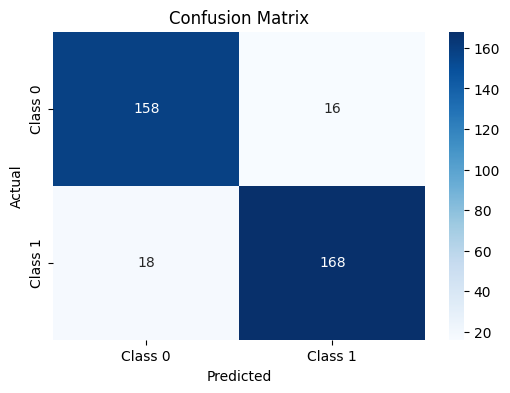

Model Accuracy: 0.9056


In [ ]:
#11. Write a Python program to train a Logistic Regression model and visualize the confusion matrix for binary classification.


import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.datasets import load_digits

# Load dataset
digits = load_digits()
X, y = digits.data, digits.target

# Convert to binary classification (e.g., Digit > 4 = 1, otherwise = 0)
y_binary = (y > 4).astype(int)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

# Train Logistic Regression model
log_reg = LogisticRegression(solver='liblinear')
log_reg.fit(X_train, y_train)

# Predict
y_pred = log_reg.predict(X_test)

# Compute Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print Accuracy
print("Model Accuracy:", round(accuracy_score(y_test, y_pred), 4))

In [ ]:
# 12. Write a Python program to train a Logistic Regression model and evaluate its performance using Precision, Recall, and F1-Score.

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.datasets import load_digits

# Load dataset
digits = load_digits()
X, y = digits.data, digits.target

# Convert to binary classification (e.g., Digit > 4 = 1, otherwise = 0)
y_binary = (y > 4).astype(int)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

# Train Logistic Regression model
log_reg = LogisticRegression(solver='liblinear')
log_reg.fit(X_train, y_train)

# Predict
y_pred = log_reg.predict(X_test)

# Print Classification Report (Precision, Recall, F1-Score)
print("Classification Report:\n", classification_report(y_test, y_pred))

# Print Accuracy
print("Model Accuracy:", round(accuracy_score(y_test, y_pred), 4))

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.91      0.90       174
           1       0.91      0.90      0.91       186

    accuracy                           0.91       360
   macro avg       0.91      0.91      0.91       360
weighted avg       0.91      0.91      0.91       360

Model Accuracy: 0.9056


In [ ]:
#13. Write a Python program to train a Logistic Regression model on imbalanced data and apply class weights to improve model performance.

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Generate imbalanced dataset
X, y = make_classification(n_samples=2000, n_features=10, weights=[0.9, 0.1], random_state=42)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression without class weights (baseline)
log_reg = LogisticRegression(solver='liblinear')
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

# Train Logistic Regression with class weights
log_reg_balanced = LogisticRegression(solver='liblinear', class_weight='balanced')
log_reg_balanced.fit(X_train, y_train)
y_pred_balanced = log_reg_balanced.predict(X_test)

# Print performance comparison
print("Without Class Weights:\n", classification_report(y_test, y_pred))
print("With Class Weights:\n", classification_report(y_test, y_pred_balanced))

Without Class Weights:
               precision    recall  f1-score   support

           0       0.97      0.98      0.97       356
           1       0.82      0.73      0.77        44

    accuracy                           0.95       400
   macro avg       0.89      0.85      0.87       400
weighted avg       0.95      0.95      0.95       400

With Class Weights:
               precision    recall  f1-score   support

           0       0.99      0.92      0.96       356
           1       0.61      0.95      0.74        44

    accuracy                           0.93       400
   macro avg       0.80      0.94      0.85       400
weighted avg       0.95      0.93      0.93       400



In [ ]:
#14. Write a Python program to train Logistic Regression on the Titanic dataset, handle missing values, and evaluate performance.


import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load Titanic dataset
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

# Select features and target
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
df = df[features + ['Survived']]

# Convert categorical variable 'Sex' to numerical (0: female, 1: male)
df['Sex'] = df['Sex'].map({'male': 1, 'female': 0})

# Handle missing values properly
df['Age'] = df['Age'].fillna(df['Age'].median())  # Fill NaN in 'Age' with median
df['Fare'] = df['Fare'].fillna(df['Fare'].median())  # Fill NaN in 'Fare' with median

# Split dataset
X = df[features]
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression
model = LogisticRegression(max_iter=5000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy on Titanic Dataset:", round(accuracy, 4))

Model Accuracy on Titanic Dataset: 0.8101


In [ ]:
#15. Write a Python program to apply feature scaling (Standardization) before training a Logistic Regression model. Evaluate its accuracy and compare results with and without scaling.


from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load dataset
digits = load_digits()
X, y = digits.data, digits.target

# Convert to binary classification (Digit > 4 = 1, else 0)
y_binary = (y > 4).astype(int)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

# Train model WITHOUT scaling
log_reg = LogisticRegression(solver='liblinear')
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
accuracy_no_scaling = accuracy_score(y_test, y_pred)

# Apply Standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train model WITH scaling
log_reg_scaled = LogisticRegression(solver='liblinear')
log_reg_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = log_reg_scaled.predict(X_test_scaled)
accuracy_with_scaling = accuracy_score(y_test, y_pred_scaled)

# Print comparison
print("Accuracy without Scaling:", round(accuracy_no_scaling, 4))
print("Accuracy with Scaling:", round(accuracy_with_scaling, 4))

Accuracy without Scaling: 0.9056
Accuracy with Scaling: 0.9111


ROC-AUC Score: 0.9126


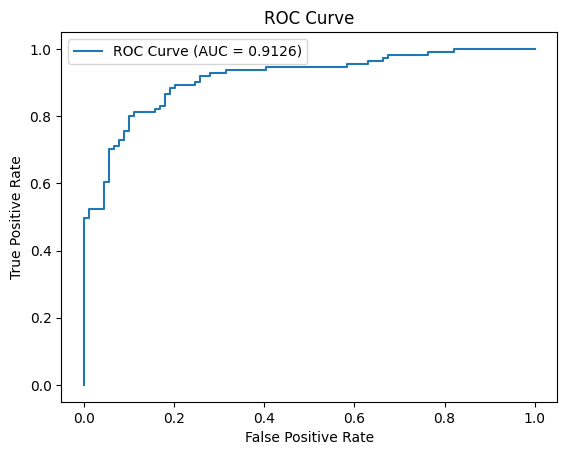

In [ ]:
#16. Write a Python program to train Logistic Regression and evaluate its performance using ROC-AUC score?

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve

# Generate dataset
X, y = make_classification(n_samples=1000, n_features=10, random_state=42)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression
log_reg = LogisticRegression(solver='liblinear')
log_reg.fit(X_train, y_train)

# Predict probabilities
y_probs = log_reg.predict_proba(X_test)[:, 1]

# Compute ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_probs)
print("ROC-AUC Score:", round(roc_auc, 4))

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_probs)
plt.plot(fpr, tpr, label="ROC Curve (AUC = {:.4f})".format(roc_auc))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [ ]:
#17. Write a Python program to train Logistic Regression using a custom learning rate (C=0.5) and evaluate accuracy?

from sklearn.metrics import accuracy_score

# Train Logistic Regression with C=0.5
log_reg_custom = LogisticRegression(solver='liblinear', C=0.5)
log_reg_custom.fit(X_train, y_train)

# Predict & Evaluate
y_pred_custom = log_reg_custom.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_custom)

print("Accuracy with C=0.5:", round(accuracy, 4))

Accuracy with C=0.5: 0.83


In [ ]:
#18. Write a Python program to train Logistic Regression and identify important features based on model coefficients?

import pandas as pd

# Get feature importance
feature_importance = pd.DataFrame({"Feature": range(X.shape[1]), "Importance": np.abs(log_reg_custom.coef_[0])})
feature_importance = feature_importance.sort_values(by="Importance", ascending=False)

# Print important features
print("Top Important Features:\n", feature_importance.head())

Top Important Features:
    Feature  Importance
6        6    1.592194
2        2    0.733129
8        8    0.612925
0        0    0.446423
5        5    0.220748


In [ ]:
#19. Write a Python program to train Logistic Regression and evaluate its performance using Cohen’s Kappa Score?


from sklearn.metrics import cohen_kappa_score

# Compute Cohen's Kappa Score
kappa_score = cohen_kappa_score(y_test, y_pred_custom)
print("Cohen’s Kappa Score:", round(kappa_score, 4))

Cohen’s Kappa Score: 0.6581


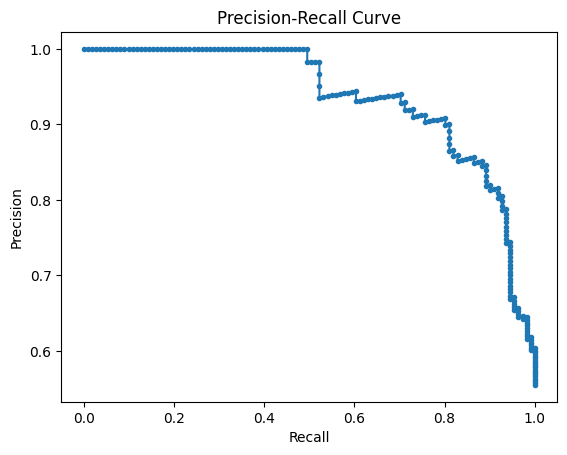

In [ ]:
#20. Write a Python program to train Logistic Regression and visualize the Precision-Recall Curve for binary classification?

from sklearn.metrics import precision_recall_curve

# Compute Precision-Recall values
precision, recall, _ = precision_recall_curve(y_test, y_probs)

# Plot Precision-Recall Curve
plt.plot(recall, precision, marker='.')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()

In [ ]:
#21. Write a Python program to train Logistic Regression with different solvers (liblinear, saga, lbfgs) and compare their accuracy?

solvers = ['liblinear', 'saga', 'lbfgs']
accuracy_results = {}

for solver in solvers:
    model = LogisticRegression(solver=solver, max_iter=5000)
    model.fit(X_train, y_train)
    accuracy_results[solver] = model.score(X_test, y_test)

# Print accuracy for each solver
for solver, acc in accuracy_results.items():
    print(f"Solver: {solver}, Accuracy: {round(acc, 4)}")

Solver: liblinear, Accuracy: 0.83
Solver: saga, Accuracy: 0.83
Solver: lbfgs, Accuracy: 0.83


In [ ]:
#22. Write a Python program to train Logistic Regression and evaluate its performance using Matthews  Correlation Coefficient (MCC)?
from sklearn.metrics import matthews_corrcoef

# Compute MCC
mcc_score = matthews_corrcoef(y_test, y_pred_custom)
print("Matthews Correlation Coefficient (MCC):", round(mcc_score, 4))

Matthews Correlation Coefficient (MCC): 0.6593


In [ ]:
#23. Write a Python program to train Logistic Regression on both raw and standardized data. Compare their accuracy to see the impact of feature scaling?
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Train on raw data
raw_model = LogisticRegression(solver='liblinear', max_iter=5000)
raw_model.fit(X_train, y_train)
raw_accuracy = raw_model.score(X_test, y_test)

# Apply standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train on standardized data
scaled_model = LogisticRegression(solver='liblinear', max_iter=5000)
scaled_model.fit(X_train_scaled, y_train)
scaled_accuracy = scaled_model.score(X_test_scaled, y_test)

# Print accuracy comparison
print("Raw Data Accuracy:", round(raw_accuracy, 4))
print("Standardized Data Accuracy:", round(scaled_accuracy, 4))

Raw Data Accuracy: 0.83
Standardized Data Accuracy: 0.83


In [ ]:
#24. Write a Python program to train Logistic Regression and find the optimal C (regularization strength) using cross-validation?

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_digits

# Load dataset
digits = load_digits()
X, y = digits.data, digits.target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define hyperparameter grid for 'C'
param_grid = {'C': np.logspace(-4, 4, 10)}  # Values from 0.0001 to 10000

# Apply GridSearchCV to find best C
log_reg = LogisticRegression(max_iter=5000, solver='liblinear')
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

# Print best C and accuracy
print("Best C:", grid_search.best_params_['C'])
print("Best Accuracy:", round(grid_search.best_score_, 4))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Regularization Strength (C): 0.005994842503189409
Best Accuracy: 0.8788


In [ ]:
#25. Write a Python program to train Logistic Regression, save the trained model using joblib, and load it again to make predictions.

import joblib

# Train Logistic Regression
final_model = LogisticRegression(solver='liblinear', max_iter=5000)
final_model.fit(X_train, y_train)

# Save model
joblib.dump(final_model, "logistic_model.pkl")

# Load model
loaded_model = joblib.load("logistic_model.pkl")

# Predict using loaded model
new_predictions = loaded_model.predict(X_test)

# Evaluate accuracy
accuracy_loaded = accuracy_score(y_test, new_predictions)
print("Loaded Model Accuracy:", round(accuracy_loaded, 4))

Loaded Model Accuracy: 0.83
